# Elastodynamics
***
***

## General formulation of the problem
---

For a fixed time horizon $T>0$ let us denote
\begin{align*}
    I:= [0,T],
    &&
    Q := I \times \Omega,
    &&
    \Sigma := I \times \partial \Omega,
    &&
    \Sigma_D := I \times \partial \Gamma_D,
    &&
    \Sigma_N := I \times \partial \Gamma_N,
\end{align*}
where $\Omega$ is a bounded spatial domain, $\partial \Omega$ is its boundary, and $\Gamma_D$, $\Gamma_N$ denote the part of boundary where Dirichlet and Neumann boundary condition is prescribed.

Using this notation the evolution problem reads
\begin{align*}
	\rho \ddot{\mathbf{u}} &= \text{div} \boldsymbol{\sigma} + \mathbf{b} && \text{in } Q, \\
	\sigma \mathbf{n} &= \mathbf{g} && \text{on } \Sigma_N, \\
	\mathbf{u} &= \mathbf{u}_D && \text{on } \Sigma_D, \\
    \mathbf{u}(0,\cdot) &= \mathbf{u}_0 && \text{in } \Omega, \\
    \dot{\mathbf{u}}(0,\cdot) &= \mathbf{v}_0 && \text{in } \Omega, \\
\end{align*}
where $\dot{\mathbf{u}}$, $\ddot{\mathbf{u}}$ denote
the first and the second derivative of displacement with respect to time. The spatial fields $\mathbf{u}_0$, $\mathbf{v}_0$ denote the initial condition for displacement and velocity. The rest of the notation remains the same as earlier, i.e. $\mathbf{b}$ is the volumetric force density, $\mathbf{g}$ is the normal traction on the Neumann part of the boundary of $\Omega$,
and $\mathbf{u}_D$ is the prescribed displacement at the Dirichlet part of $\partial \Omega$. The symbol $\boldsymbol{\sigma}$ denotes the stress tensor which is, for an isotropic material, given by
\begin{equation}
    \boldsymbol{\sigma}=\lambda\mathrm{tr}(\boldsymbol{\varepsilon})\mathbf{I} + 2\mu\boldsymbol{\varepsilon}, \end{equation}
where the strain tensor $\boldsymbol{\varepsilon}$ takes the form
\begin{equation}
    \boldsymbol{\varepsilon}=\frac{1}{2}\left(\nabla\mathbf{u}+ \left( \nabla\mathbf{u} \right)^{\top} \right),
\end{equation}
while $\lambda, \mu$ are Lame's constants which can be expressed in terms of the Young's modulus $E$ and Poisson's ratio $\nu$ as
\begin{equation}
    \lambda = \frac{E \nu}{(1 + \nu) (1 - 2 \nu)},
    \qquad
    \mu = \frac{E}{2(1 + \nu)}.
\end{equation}

The weak formulation of our evolution problem reads: Find $\mathbf{u}$ s.t. for almost all times $t \in I$
we have $\mathbf{u}(t)-\bar{\mathbf{u}}(t) \in \mathbf{V}$ and
\begin{align*}
    \left\langle \sqrt{\rho} \ddot{\mathbf{u}}, \sqrt{\rho} \delta\mathbf{u} \right\rangle_{\mathbf{V}^*,\mathbf{V}}
    +
    \int_{\Omega} \boldsymbol{\sigma} : \delta \boldsymbol{\varepsilon} \, \mathrm{dV}
    = \int_{\Omega} \mathbf{b}\cdot\delta\mathbf{u} \, \mathrm{dV}
    + \int_{\Gamma_N}\mathbf{g}\cdot\delta\mathbf{u} \, \mathrm{dS},
    \qquad \forall \delta\mathbf{u} \in \mathbf{V},
\end{align*}
where $\mathbf{V} = \{ v \in H^1(\Omega)| v = 0\ \text{on}\ \Gamma_\mathrm{D}\}$
and $\left\langle \cdot, \cdot \right\rangle_{\mathbf{V}^*,\mathbf{V}}$ denotes the duality.
The initial conditions need to be imposed separately.

Why do we need the duality? It is acctually very natural, because the general strong form of the equation is $\ddot{\mathbf{u}} = - \nabla E$, where $E$ is the energy. And since the derivative of $E$ lies in the co-tangent bundel (i.e. dual), so does the second derivative. In this example, $\boldsymbol{\sigma}$ is a priori only in $L^2$ and hence the derivative of energy is a functional that cannot be written as an itegral of some function multiplied by $\delta \mathbf{u}$. In other words, we cannot obtain better a priori estimates for $\ddot{\mathbf{u}}$. If we knew e.g. that $\boldsymbol{\sigma} \in H(\text{div};\Omega)$, we would obtain, after integration by parts, that $\rho \ddot{\mathbf{u}} = (\text{div } \boldsymbol{\sigma} + \mathbf{b}) \in L^2$ and the duality would indeed become a simple integral.

## Time discretization and integration schemes
---

After discretizing in time, the weak formulation at a specific time instant $t_{i+1}$ reads: Find $\mathbf{u}_{i+1}$ s.t.
\begin{equation}
    \int_{\Omega} \rho \ddot{\mathbf{u}}_{i+1} \cdot \delta\mathbf{u} \mathrm{dV}
    + \int_\Omega\boldsymbol{\sigma}_{i+1}:\delta\boldsymbol{\varepsilon}\ \mathrm{dV}
    = \int_\Omega \mathbf{b}\cdot\delta\mathbf{u}\ \mathrm{dV}
    + \int_{\partial\Omega}\mathbf{g}\cdot\delta\mathbf{u}\ \mathrm{dS},
    \quad \forall \delta\mathbf{u}.
\end{equation}
Note that the duality was substituted by an integral. The reason why is that we approximate the second derivative by more regular functions for which the duality is given by an integral of their functional values solely, no derivatives are involved; c.f. the Gelfand tripple.

The time integration scheme depends on the type of discretization of the second derivative. Below, we introduce disretizations which lead to implicit and explicit integrators. However, in the implementation we shall treat the implicit integrator only. It is a simple exercise to modify the code to the case of an explicit integrator.

### Implicit integrator
For constant acceleration Newmark method, velocity and displacement at time $t_{i+1}$ can be expressed in terms of the previous time instant $t_i$ as
\begin{equation}
\dot{\mathbf{u}}_{i+1}=\dot{\mathbf{u}}_{i} + \frac{\Delta t}{2}(\ddot{\mathbf{u}}_{i} + \ddot{\mathbf{u}}_{i+1}),
\end{equation}
\begin{equation}
\mathbf{u}_{i+1} = \mathbf{u}_{i} + \Delta t\dot{\mathbf{u}}_{i} + \frac{\Delta t^2}{4}(\ddot{\mathbf{u}}_{i} + \ddot{\mathbf{u}}_{i+1}),
\end{equation}
which can be rearranged to
\begin{equation}
\ddot{\mathbf{u}}_{i+1} = \frac{4}{\Delta t^2}(\mathbf{u}_{i+1} - \tilde{\mathbf{u}}_{i}),
\end{equation}
where we introduced an auxiliary variable
\begin{equation}
\tilde{\mathbf{u}}_{i} = \mathbf{u}_{i} + \Delta t\dot{\mathbf{u}}_{i} + \frac{\Delta t^2}{4}\ddot{\mathbf{u}}_{i}.
\end{equation}
After substituting the expression for $\ddot{\mathbf{u}}_{i+1}$ into the weak form, we arrive at an equation for $\mathbf{u}_{i+1}$
\begin{equation}
    \int_\Omega\rho\left(\frac{4}{\Delta t^2}(\mathbf{u}_{i+1} - \tilde{\mathbf{u}}_{i})\right)\cdot\delta\mathbf{u}\,\mathrm{dV}
    + \int_\Omega\boldsymbol{\sigma}_{i+1}:\delta\boldsymbol{\varepsilon}\ \mathrm{dV}
    = \int_\Omega \mathbf{b}\cdot\delta\mathbf{u}\ \mathrm{dV}
    + \int_{\partial\Omega}\mathbf{g}\cdot\delta\mathbf{u}\ \mathrm{dS}
    , \quad \forall \delta\mathbf{u},
\end{equation}
where the value of the initial $\mathbf{u}_0$ has to be such that the prescribed initial displacement and velocity are met.

### Explicit integrator

In the forward Euler method, acceleration at time $t_{i+1}$ is approximated by the forward finite difference as
\begin{equation}
\ddot{\mathbf{u}}_{i+1}=\frac{\mathbf{u}_{i+2} - 2\mathbf{u}_{i+1} + \mathbf{u}_{i}}{\Delta t^2}.
\end{equation}

After substituting this expression into the weak form, we get an equation for $\mathbf{u}_{i+2}$
\begin{equation}
    \int_\Omega\rho\frac{\mathbf{u}_{i+2} - 2\mathbf{u}_{i+1} + \mathbf{u}_{i}}{\Delta t^2}\cdot\delta\mathbf{u}\,\mathrm{dV} 
    +
    \int_\Omega \boldsymbol{\sigma}_{i+1}:\delta\boldsymbol{\varepsilon} \, \mathrm{dV} 
    =
    \int_\Omega \mathbf{b}\cdot\delta\mathbf{u} \, \mathrm{dV} 
    +
    \int_{\partial\Omega}\mathbf{g}\cdot\delta\mathbf{u} \, \mathrm{dS} = 0, 
    \quad \forall \delta\mathbf{u},
\end{equation}
where the values of the initial $\mathbf{u}_0$, $\mathbf{u}_1$ have to be such that the prescribed initial displacement and velocity are met.

## Implementation
---

We again import all neccessary packages and define auxiliary functions and parameters. 

In [11]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np
import time

# --------------------
# Parameters
# --------------------
# Lame's constants
lmbda = 1.25
mu = 1.0
# Density
rho = 1.0

# Geometry of the domain
l_x, l_y, l_z = 1.0, 1.0, 0.1  # Domain dimensions
# Discretization of the domain
n_x, n_y, n_z = 100, 100, 2  # Number of elements

# Load
f_int = 1.0e-1


# --------------------
# Functions and classes
# --------------------
def bottom(x, on_boundary):
    return (on_boundary and fe.near(x[1], 0.0))


def indent_area(x, on_boundary):
    return (on_boundary and fe.near(x[1], l_y) and abs(x[0] - 0.5*l_x) < 0.2*l_x)


# Strain function
def epsilon(u):
    return 0.5*(fe.grad(u) + fe.grad(u).T)


# Stress function
def sigma(u):
    return lmbda*fe.div(u)*fe.Identity(2) + 2*mu*epsilon(u)

We also define start time, end time and time step. There are many options how to construct a time loop, we do so by using NumPy's `linspace()` function which returns an array of equidistantly spaced numbers over a specified interval.

In [12]:
# Time-stepping
t_start = 0.0  # start time
t_end = 1.0e-1  # end time
t_steps = 100  # number of time steps

t, dt = np.linspace(t_start, t_end, t_steps, retstep=True)
dt = np.asscalar(dt)

Mesh geometry is imported from an external `.xml` file.

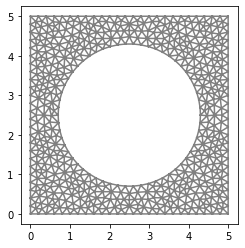

In [13]:
# --------------------
# Geometry
# --------------------
mesh = fe.Mesh("external_mesh.xml")

fe.plot(mesh)
plt.show()

Next, we create a vector-valued function space and trial/test functions corresponding to this space.

In [14]:
# --------------------
# Function spaces
# --------------------
V = fe.VectorFunctionSpace(mesh, "CG", 1)
u_tr = fe.TrialFunction(V)
u_test = fe.TestFunction(V)

Neumann boundary conditions are prescribed as previously. For a time-dependent Dirichlet boundary condition we can define new `DirichletBC` object for each time step and send it to the solver. A more elegant way is to use the FEniCS' object `Expression` which is a user-defined function written in the C/C++ syntax which can contain any number of free parameters. In our case we parametrize Dirichlet boundary function by a pseudo time $t$ which is constant in space (`degree=0`). The update of the expression is done via the command `u_D.t=...`.

In [15]:
# --------------------
# Boundary conditions
# --------------------
u_D = fe.Expression(" t < 1.0e-2 ? -100*t : -1.0", t=0.0, degree=0)

bc1 = fe.DirichletBC(V, fe.Constant((0.0, 0.0)), bottom)
bc2 = fe.DirichletBC(V.sub(1), u_D, indent_area)
bc = [bc1, bc2]

Now, we can initialize all the functions we need. Here, `u_bar` represents $\tilde{\mathbf{u}}$, `du` is $\dot{\mathbf{u}}$ and `ddu` is $\ddot{\mathbf{u}}$.

In [16]:
# --------------------
# Initialization
# --------------------
u = fe.Function(V)
u_bar = fe.Function(V)
du = fe.Function(V)
ddu = fe.Function(V)
ddu_old = fe.Function(V)

To be able to save the results we set up an output `.xdmf` file which is suitable to work with in a dynamic regime.

In [17]:
file = fe.XDMFFile("FEniCS_2a_output.xdmf")
file.parameters["flush_output"] = True

The parameter `flush_output` enables the user to preview the solution (e.g. in ParaView) during the process of long computations.

Finally, we are in position to write down the weak formulation of our problem and solve it. The weak formulation for the constant acceleration Newmark method reads as follows.

In [18]:
# --------------------
# Weak form
# --------------------
A_form = fe.inner(sigma(u_tr), epsilon(u_test))*fe.dx + 4*rho/(dt*dt)*fe.dot(u_tr - u_bar, u_test)*fe.dx

The problem is then solved using a `for` loop over time. As a first step we update the Dirichlet boundary condition `u_D` for the current time step `ti` and we assign the auxiliary variable `u_bar` a new value corresponding to the current time step `ti`. We then solve the algebraic problem in a standard fashion. The rest is just updating of the auxiliary variables `ddu_old`, `ddu` and `du`. Note that for the `.assign` method to work the input functions must be elements of the same function space as the function that's being assigned a new value.

In [19]:
# --------------------
# Time loop
# --------------------
for ti in t:
    u_D.t = ti
    u_bar.assign(u + dt*du + 0.25*dt*dt*ddu)
    
    #A, b = fe.assemble_system(fe.lhs(A_form), fe.rhs(A_form), bc)
    #fe.solve(A, u.vector(), b, "cg", "jacobi")
    fe.solve(fe.lhs(A_form) == fe.rhs(A_form), u, bc)
    
    ddu_old.assign(ddu)
    ddu.assign(4/(dt*dt)*(u - u_bar))
    du.assign(du + 0.5*dt*(ddu + ddu_old))

    file.write(u, ti)
    
    #print(ti)
file.close()

The line `file.write(u, ti)` writes the computed displacement `u` at time `ti` to the output file. Remember to `.close()` the file when you are done with it.

## Complete code
---

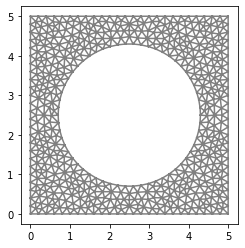

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [20]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np
import time


# --------------------
# Functions and classes
# --------------------
def bottom(x, on_boundary):
    return (on_boundary and fe.near(x[1], 0.0))


def indent_area(x, on_boundary):
    return (on_boundary and fe.near(x[1], l_y) and abs(x[0] - 0.5*l_x) < 0.2*l_x)


# Strain function
def epsilon(u):
    return 0.5*(fe.nabla_grad(u) + fe.nabla_grad(u).T)


# Stress function
def sigma(u):
    return lmbda*fe.div(u)*fe.Identity(2) + 2*mu*epsilon(u)


# --------------------
# Parameters
# --------------------
# Young's modulus and Poisson's ratio
E = 0.02e9
nu = 0.1

# Lame's constants
lmbda = E*nu/(1+nu)/(1-2*nu)
mu = E/2/(1+nu)
rho = 200.0

l_x, l_y = 5.0, 5.0  # Domain dimensions

# Time-stepping
t_start = 0.0  # start time
t_end = 1.0e-1  # end time
t_steps = 100  # number of time steps

t, dt = np.linspace(t_start, t_end, t_steps, retstep=True)
dt = np.asscalar(dt)

# --------------------
# Geometry
# --------------------
mesh = fe.Mesh("external_mesh.xml")

fe.plot(mesh)
plt.show()

# --------------------
# Function spaces
# --------------------
V = fe.VectorFunctionSpace(mesh, "CG", 1)
u_tr = fe.TrialFunction(V)
u_test = fe.TestFunction(V)

# --------------------
# Boundary conditions
# --------------------
u_D = fe.Expression(" t < 1.0e-2 ? -100*t : -1.0", t=0.0, degree=0)

bc1 = fe.DirichletBC(V, fe.Constant((0.0, 0.0)), bottom)
bc2 = fe.DirichletBC(V.sub(1), u_D, indent_area)
bc = [bc1, bc2]

# --------------------
# Initialization
# --------------------
u = fe.Function(V)
u_bar = fe.Function(V)
du = fe.Function(V)
ddu = fe.Function(V)
ddu_old = fe.Function(V)

file = fe.XDMFFile("FEniCS_explicit_output.xdmf")  # XDMF file

# --------------------
# Weak form
# --------------------
A_form = fe.inner(sigma(u_tr), epsilon(u_test))*fe.dx + 4*rho/(dt*dt)*fe.dot(u_tr - u_bar, u_test)*fe.dx

# --------------------
# Time loop
# --------------------
for ti in t:
    u_D.t = ti
    u_bar.assign(u + dt*du + 0.25*dt*dt*ddu)
    
    #A, b = fe.assemble_system(fe.lhs(A_form), fe.rhs(A_form), bc)
    #fe.solve(A, u.vector(), b, "cg", "jacobi")
    fe.solve(fe.lhs(A_form) == fe.rhs(A_form), u, bc)
    
    ddu_old.assign(ddu)
    ddu.assign(4/(dt*dt)*(u - u_bar))
    du.assign(du + 0.5*dt*(ddu + ddu_old))

    file.write(u, ti)
    
    #print(ti)
file.close()